In [1]:
import os
import glob
import json
import tqdm
import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
cwd = os.getcwd()
result_dir = os.path.join(cwd, "result")
down_dir = os.path.join(cwd, "downloads")

info_dir = os.path.join(result_dir, "video_url")
repr_dir = os.path.join(result_dir, "represent")
anlz_dir = os.path.join(result_dir, "analyzed")
sort_dir = os.path.join(result_dir, "sorted")

In [3]:
video_list = glob.glob(os.path.join(down_dir, '*.mp4'))

In [4]:
sorted_list = glob.glob(os.path.join(sort_dir, "*", "*.jpg"))

In [5]:
image_names = [os.path.basename(img).split(".")[0] for img in sorted_list]

In [6]:
print(len(image_names))
print(image_names)

4919
['11210764_02', '11211063_02', '11211362_01', '11211661_02', '11212558_01', '1123887_01', '1125083_01', '112598_01', '1126877_02', '1128073_02', '112897_01', '11613156_02', '1162990_01', '116299_01', '1164485_02', '1169269_02', '350_02', '3510764_02', '3511063_01', '3511362_03', '3511661_02', '3511960_01', '351196_03', '3512259_01', '3512558_03', '3512857_03', '3513156_03', '3513455_03', '3513754_03', '3514053_02', '3514352_02', '3514651_02', '3514950_02', '351495_03', '3515249_03', '3515548_03', '3516445_03', '3516744_02', '3517043_02', '3517940_03', '351794_03', '3518837_03', '3519435_01', '3520033_02', '352093_03', '3521528_01', '3522126_02', '3523023_03', '3523322_03', '3523621_02', '3523920_01', '352392_02', '3524219_03', '3524518_03', '3525415_02', '3526312_02', '3526611_02', '3526910_01', '352691_03', '3527209_01', '3527508_01', '3527807_01', '3528405_02', '3528704_01', '3529302_01', '3529900_03', '352990_03', '3530199_03', '3531096_01', '3532292_01', '353289_03', '3533488_

In [7]:
try:
    with open(os.path.join(info_dir, "image_to_title.json"), "r", encoding = "UTF-8-SIG") as f:
        image_to_title = json.load(f, ensure_ascii=False)
    print("Saved File Loaded!")
except:
    image_to_title = {}

gennames = {name : name.split("_")[0] for name in image_names}
gname_key = list(gennames.keys())
gname_val = list(gennames.values())
    
for idx, video in enumerate(tqdm.tqdm(video_list)):
        filename = os.path.basename(video).split(".")[0]
        
        target_video = cv2.VideoCapture(video)

        # Find OpenCV version
        (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

        if int(major_ver)  < 3 :
            fps = target_video.get(cv2.cv.CV_CAP_PROP_FPS)
        else :
            fps = target_video.get(cv2.CAP_PROP_FPS)
        
        count = 0
        while True:
            success, image = target_video.read()
            
            if not success:
                break

            gen_name = f"{idx}{count}"

            if gen_name in gname_val:
                g_idx = [i for i, x in enumerate(gname_val) if x == gen_name]
                keys = [gname_key[gi] for gi in g_idx]
                for key in keys:
                    image_to_title[key] = filename
            count += 1
        
        target_video.release()

with open(os.path.join(info_dir, "image_to_title.json"), "w", encoding = "UTF-8-SIG") as file_out:
    json.dump(image_to_title, file_out, ensure_ascii=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [21:25<00:00,  8.92s/it]


In [8]:
print(len(image_to_title.keys()))

4153


In [9]:
for name in tqdm.tqdm(image_names):
    try:
        image_to_title[name]
    except:
        image_to_title[name] = "Not Found Yet"
        print(f"Title not Found for {name}")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4919/4919 [00:00<00:00, 144657.54it/s]

Title not Found for 3516445_03
Title not Found for 3516744_02
Title not Found for 3517043_02
Title not Found for 3517940_03
Title not Found for 3518837_03
Title not Found for 3519435_01
Title not Found for 3520033_02
Title not Found for 3521528_01
Title not Found for 3522126_02
Title not Found for 3523023_03
Title not Found for 3523322_03
Title not Found for 3523621_02
Title not Found for 3523920_01
Title not Found for 3524219_03
Title not Found for 3524518_03
Title not Found for 3525415_02
Title not Found for 3526312_02
Title not Found for 3526611_02
Title not Found for 3526910_01
Title not Found for 3527209_01
Title not Found for 3527508_01
Title not Found for 3527807_01
Title not Found for 3528405_02
Title not Found for 3528704_01
Title not Found for 3529302_01
Title not Found for 3529900_03
Title not Found for 3530199_03
Title not Found for 3531096_01
Title not Found for 3532292_01
Title not Found for 3533488_02
Title not Found for 3533787_03
Title not Found for 3535282_02
Title no

In [10]:
nfy_count = 0
for val in image_to_title.values():
    if val == "Not Found Yet":
        nfy_count+=1
print(nfy_count)

765


In [28]:
 with open(os.path.join(anlz_dir, "analysis_result.json"), "r", encoding = "UTF-8-SIG") as f:
    analysis = json.load(f)

In [29]:
with open(os.path.join(info_dir, "image_to_title.json"), "r", encoding = "UTF-8-SIG") as f:
    image_to_title = json.load(f)

In [30]:
def softmax(x):
    y = np.exp(x - np.max(x))
    f_x = y / np.sum(np.exp(x))
    return f_x

In [31]:
search_results = glob.glob(os.path.join(info_dir, "videos_results_*"))
video_info = dict()
for s_path in search_results:
    with open(s_path, 'r', encoding = "UTF-8-SIG") as file_load:
        s_dict = json.load(file_load)
        video_info.update(s_dict)

In [32]:
gender_manu = [1,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0]

In [49]:
list_sort_dir = glob.glob(os.path.join(sort_dir, "*"))
indivisual_result = {}
for cont in tqdm.tqdm(list_sort_dir):
    face_id = os.path.basename(cont)
    indivisual_result[face_id] = {}
    target_names = [name.split(".")[0] for name in os.listdir(cont)]
    emotion = np.zeros((7,))
    age = []
    race = np.zeros((6,))
    view = 0
    count = 0
    
    for name in target_names:
        try:
            a_dict = analysis[name]
            emotions = list(a_dict["emotion"].keys())
            emotion += np.array(list(a_dict["emotion"].values()))
            age.append(a_dict["age"])
            races = list(a_dict["race"].keys())
            race += np.array(list(a_dict["race"].values()))
            
            view += int(video_info[image_to_title[name]]["viewCount"])
            count += 1
        except:
            pass
            
    emotion /= np.sum(emotion)
    age = np.mean(age)
    race /= np.sum(race)
    view_log = np.log10(view)
    
    indivisual_result[face_id]["emotion"] = {k:v for k,v in zip(emotions, emotion)}
    indivisual_result[face_id]["age"] = age
    indivisual_result[face_id]["gender"] = "female" if gender_manu[int(face_id)] == 0 else "male"
    indivisual_result[face_id]["race"] = {k : v for k,v in zip(races, race)}
    indivisual_result[face_id]["race_d"] = races[np.argmax(race)]
    indivisual_result[face_id]["reaction score"] = view
    indivisual_result[face_id]["log reaction score"] = view_log
    indivisual_result[face_id]["frequency"] = count
    
with open(os.path.join(anlz_dir, "indivisual_result.json"), "w", encoding = "UTF-8-SIG") as file_out:
    json.dump(indivisual_result, file_out, ensure_ascii=False)

  0%|                                                                                                                          | 0/111 [00:00<?, ?it/s]<ipython-input-49-0f0c45a629de>:30: RuntimeWarning: divide by zero encountered in log10
  view_log = np.log10(view)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 1312.40it/s]


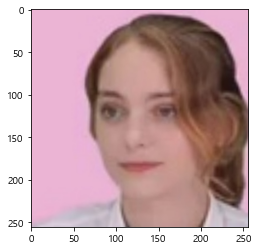

{'emotion': {'angry': 0.004061825154617022, 'disgust': 0.00010859419325413704, 'fear': 0.2064692430773126, 'happy': 0.21023410667667314, 'sad': 0.24651508664771424, 'surprise': 0.03792967861095094, 'neutral': 0.294681465639478}, 'age': 30.4875, 'gender': 'female', 'race': {'asian': 0.10541191519732661, 'indian': 0.01756166739256781, 'black': 0.0017709896883807822, 'white': 0.5666781469204882, 'middle eastern': 0.19085033125565484, 'latino hispanic': 0.1177269495455817}, 'race_d': 'white', 'reaction score': 7.089293243419367, 'frequency': 16}


In [34]:
img_path = os.path.join(sort_dir, "10", "20_02.jpg")

%matplotlib inline
pil_im = Image.open(img_path)
plt.imshow(np.asarray(pil_im))
plt.show()
print(indivisual_result["10"])

In [35]:
plot_dir = os.path.join(result_dir, "figures")
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

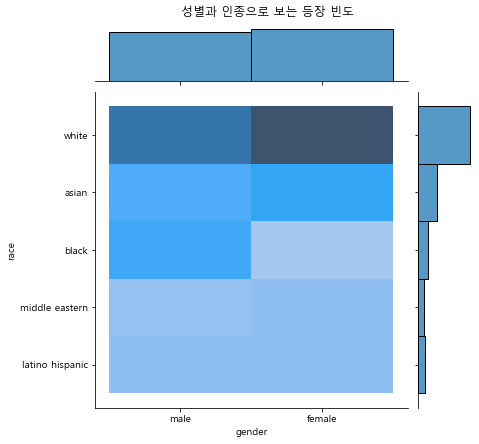

In [41]:
frequencies = pd.DataFrame(data={"gender":[dict["gender"] for dict in indivisual_result.values()], "race":[dict["race_d"] for dict in indivisual_result.values()], "frequency":[dict["frequency"] for dict in indivisual_result.values()], "age":[dict["age"] for dict in indivisual_result.values()]})
sns.jointplot(data=frequencies, x="gender", y="race", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 인종으로 보는 등장 빈도", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 인종으로 보는 등장 빈도.png"), dpi=300)

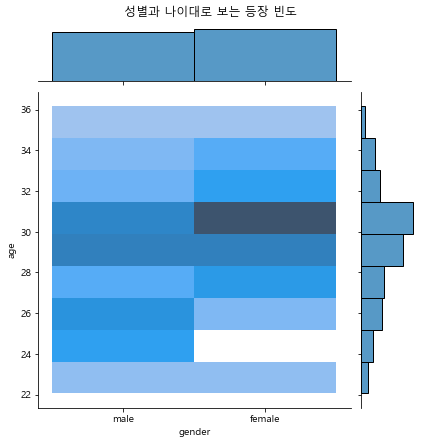

In [42]:
sns.jointplot(data=frequencies, x="gender", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 나이대로 보는 등장 빈도", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 나이대로 보는 등장 빈도.png"), dpi=300)

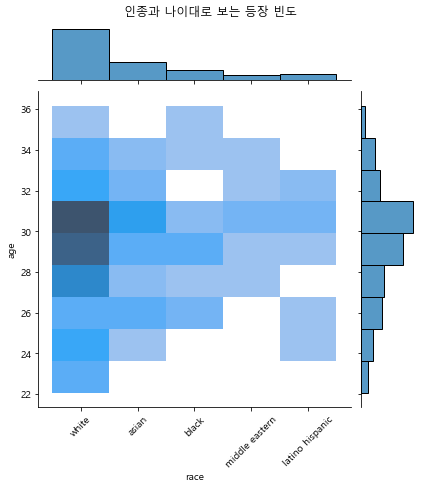

In [44]:
g = sns.jointplot(data=frequencies, x="race", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("인종과 나이대로 보는 등장 빈도", y=1.02)
plt.setp(g.ax_joint.get_xticklabels(), rotation=45)
plt.savefig(os.path.join(plot_dir, "인종과 나이대로 보는 등장 빈도.png"), dpi=300)

C:\Users\come1\anaconda3\envs\youtube_crawl\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\come1\anaconda3\envs\youtube_crawl\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


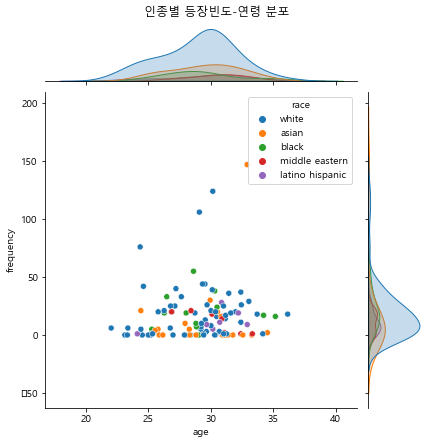

In [47]:
g = sns.jointplot(data=frequencies, x="age", y="frequency", hue="race", kind="scatter")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("인종별 등장빈도-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "인종별 등장빈도-연령 분포.png"), dpi=300)

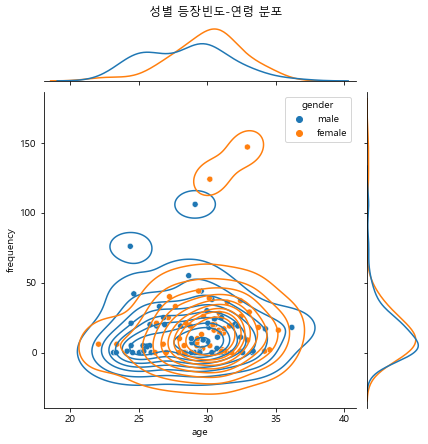

In [48]:
g = sns.jointplot(data=frequencies, x="age", y="frequency", hue="gender", kind="kde")
g.plot_joint(sns.scatterplot)
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별 등장빈도-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별 등장빈도연령 분포.png"), dpi=300)

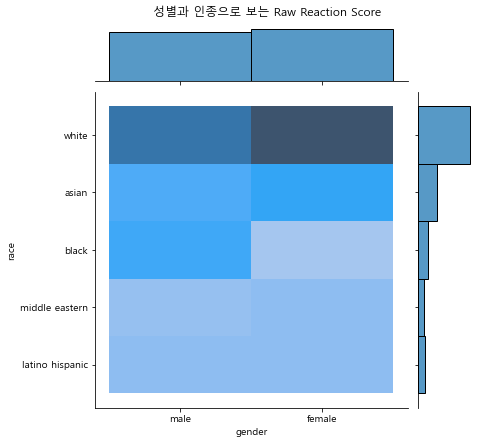

In [68]:
log_reaction_scores = pd.DataFrame(data={"gender":[dict["gender"] for dict in indivisual_result.values()], "race":[dict["race_d"] for dict in indivisual_result.values()], "log reaction score":[dict["log reaction score"] for dict in indivisual_result.values()], "age":[dict["age"] for dict in indivisual_result.values()]})
reaction_scores = pd.DataFrame(data={"gender":[dict["gender"] for dict in indivisual_result.values()], "race":[dict["race_d"] for dict in indivisual_result.values()], "reaction score":[dict["reaction score"] for dict in indivisual_result.values()], "age":[dict["age"] for dict in indivisual_result.values()]})
sns.jointplot(data=reaction_scores, x="gender", y="race", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 인종으로 보는 Raw Reaction Score", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 인종으로 보는 Raw Reaction Score.png"), dpi=300)

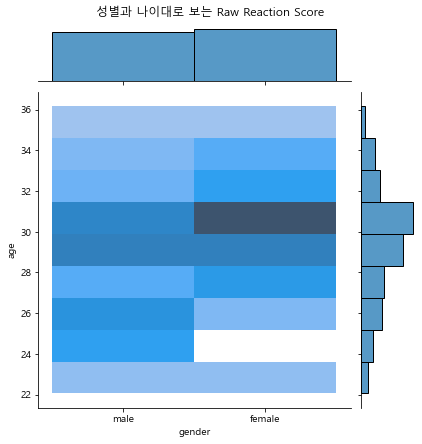

In [69]:
sns.jointplot(data=reaction_scores, x="gender", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 나이대로 보는 Raw Reaction Score", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 나이대로 보는 Raw Reaction Score.png"), dpi=300)

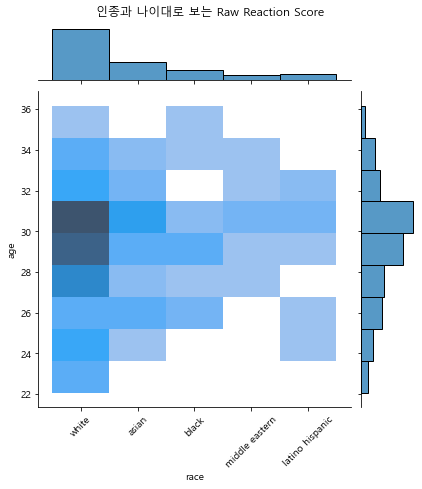

In [70]:
g = sns.jointplot(data=reaction_scores, x="race", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("인종과 나이대로 보는 Raw Reaction Score", y=1.02)
plt.setp(g.ax_joint.get_xticklabels(), rotation=45)
plt.savefig(os.path.join(plot_dir, "인종과 나이대로 보는 Raw Reaction Score.png"), dpi=300)

C:\Users\come1\anaconda3\envs\youtube_crawl\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\come1\anaconda3\envs\youtube_crawl\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


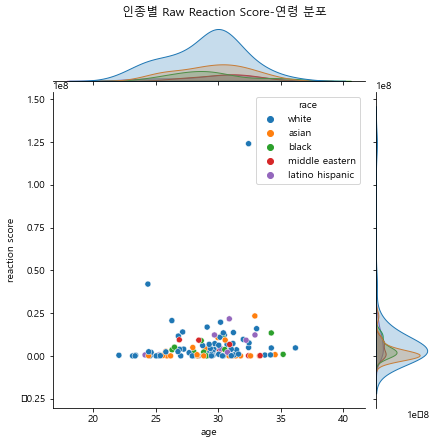

In [71]:
g = sns.jointplot(data=reaction_scores, x="age", y="reaction score", hue="race", kind="scatter")
plt.suptitle("인종별 Raw Reaction Score-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "인종별 Raw Reaction Score-연령 분포.png"), dpi=300)

C:\Users\come1\anaconda3\envs\youtube_crawl\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\come1\anaconda3\envs\youtube_crawl\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


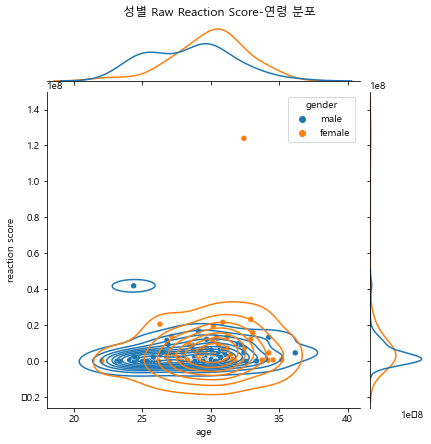

In [72]:
g = sns.jointplot(data=reaction_scores, x="age", y="reaction score", hue="gender", kind="kde")
g.plot_joint(sns.scatterplot)
plt.suptitle("성별 Raw Reaction Score-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별 Raw Reaction Score-연령 분포.png"), dpi=300)

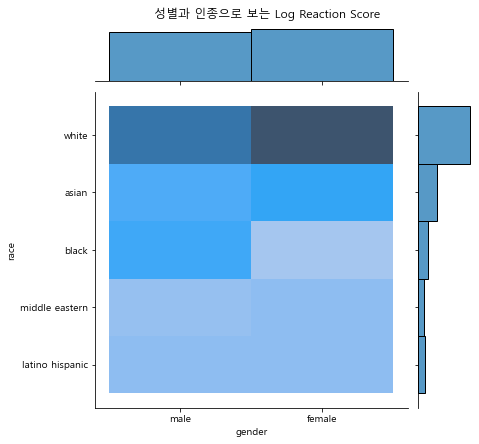

In [59]:
sns.jointplot(data=log_reaction_scores, x="gender", y="race", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 인종으로 보는 Log Reaction Score", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 인종으로 보는 Log Reaction Score.png"), dpi=300)

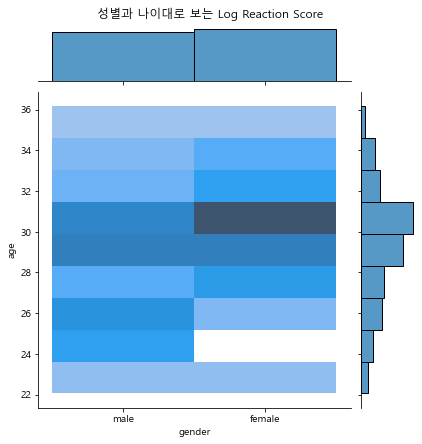

In [60]:
sns.jointplot(data=log_reaction_scores, x="gender", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("성별과 나이대로 보는 Log Reaction Score", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별과 나이대로 보는 Log Reaction Score.png"), dpi=300)

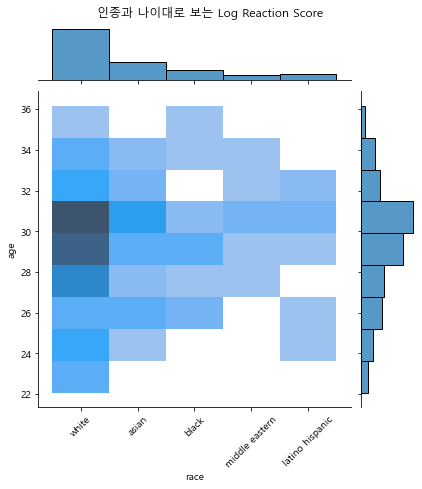

In [61]:
g = sns.jointplot(data=log_reaction_scores, x="race", y="age", kind="hist")
plt.rc('font', family='Malgun Gothic')
plt.suptitle("인종과 나이대로 보는 Log Reaction Score", y=1.02)
plt.setp(g.ax_joint.get_xticklabels(), rotation=45)
plt.savefig(os.path.join(plot_dir, "인종과 나이대로 보는 Log Reaction Score.png"), dpi=300)

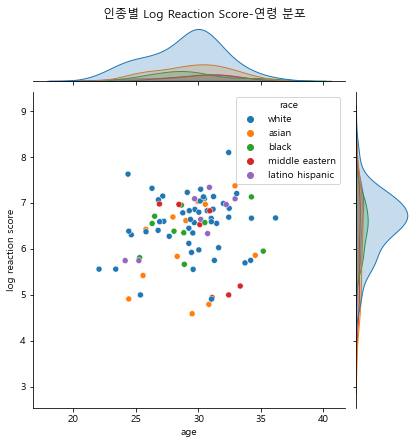

In [62]:
g = sns.jointplot(data=log_reaction_scores, x="age", y="log reaction score", hue="race", kind="scatter")
plt.suptitle("인종별 Log Reaction Score-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "인종별 Log Reaction Score-연령 분포.png"), dpi=300)

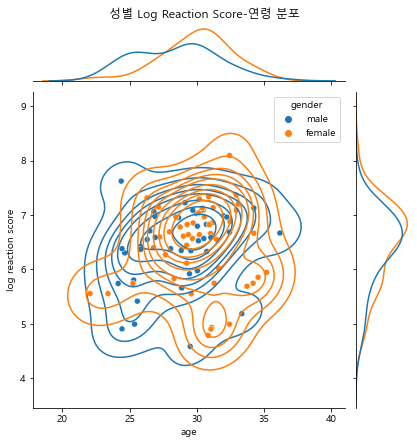

In [63]:
g = sns.jointplot(data=log_reaction_scores, x="age", y="log reaction score", hue="gender", kind="kde")
g.plot_joint(sns.scatterplot)
plt.suptitle("성별 Log Reaction Score-연령 분포", y=1.02)
plt.savefig(os.path.join(plot_dir, "성별 Log Reaction Score-연령 분포.png"), dpi=300)

In [73]:
!pip install soynlp

In [83]:
from soynlp.noun import NewsNounExtractor

In [84]:
titles = list(video_info.keys())

In [85]:
word_extractor = NewsNounExtractor()
word_extractor.train(titles)
word_score_table = word_extractor.extract()

used default noun predictor; Sejong corpus based logistic predictor
C:/Users/come1/anaconda3/envs/youtube_crawl/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (3144, 2058, 1167)
predicting noun score was done                                        
before postprocessing 207
_noun_scores_ 41
checking hardrules ... done
after postprocessing 29
extracted 0 compounds from eojeols

In [89]:
print(word_score_table.keys())

dict_keys(['일본', '충격', '외국', '외국인', '"한국', '한국', '미국', '외국인들', '영상', '이유', '지하철', '전세계', '한국인들', '사진', '친구', 'BTS', '떼창', '감동', '노래', '블랙핑크', '사람', '세계', '분석', '대만', '중국', '상황', '때문', '뮤비', '박효신'])


In [91]:
print(word_score_table["일본"])

NewsNounScore(score=0.6283397500000001, frequency=30, feature_proportion=0.47058823529411764, eojeol_proportion=0.43333333333333335, n_positive_feature=5, unique_positive_feature_proportion=0.8333333333333334)


In [93]:
for word in word_score_table.keys():
    score = word_score_table[word]
    print('%s: (score=%.3f, frequency=%d)' 
          % (word, score.score, score.frequency))

일본: (score=0.628, frequency=30)
충격: (score=0.807, frequency=20)
외국: (score=1.000, frequency=54)
외국인: (score=0.950, frequency=52)
"한국: (score=0.470, frequency=19)
한국: (score=0.718, frequency=70)
미국: (score=1.000, frequency=14)
외국인들: (score=0.999, frequency=17)
영상: (score=0.752, frequency=3)
이유: (score=1.000, frequency=25)
지하철: (score=0.703, frequency=7)
전세계: (score=1.000, frequency=4)
한국인들: (score=1.000, frequency=5)
사진: (score=0.835, frequency=6)
친구: (score=0.999, frequency=5)
BTS: (score=0.997, frequency=16)
떼창: (score=0.835, frequency=4)
감동: (score=0.995, frequency=5)
노래: (score=1.000, frequency=4)
블랙핑크: (score=1.000, frequency=7)
사람: (score=0.999, frequency=4)
세계: (score=0.998, frequency=7)
분석: (score=0.938, frequency=3)
대만: (score=0.752, frequency=3)
중국: (score=0.901, frequency=6)
상황: (score=1.000, frequency=5)
때문: (score=1.000, frequency=4)
뮤비: (score=1.000, frequency=3)
박효신: (score=0.999, frequency=3)
